In [1]:
#imports
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from sympy import diff as dif
import math
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
info = (
    ["V392 Per", 3, 5.6, 5.226, .262, 32],
    ["V407 Cyg", 5.9, 7.1, 17.77, 0.901,  102.6],
    ["V1535 Sco", 13.9, 9.7, 4.123, .208 , 2.663],
    ["V1534 Sco", 5.6, 11.6, 13.3, .665 ,14.65],
    ['V723 Cas', 263, 7.1, 13.5, 1.125 , 1697],
    ['V5589 Sgr', 4.5, 8.8, 3.423, .173, 62.3],
    ['RS Oph', 2.77,4.5, 67.597, 3.381, 9.99],
    ['U Sco', 1.89, 7.769, 0.115, 0.029, 32.53]

)

df = pd.DataFrame(info, columns = ['Nova', 't2 visual (when the optical declined by 2 mag)', 'Vpeak (optical peak apparent mag)', 
                                   'flux max (Smax)','Smax error', 'day when flux max (tmax)'])

#RS Oph info from https://academic.oup.com/mnras/article/515/3/4655/6649834, everything else is from Bella's overleaf

df

,Nova,t2 visual (when the optical declined by 2 mag),Vpeak (optical peak apparent mag),flux max (Smax),Smax error,day when flux max (tmax)
0,V392 Per,3.00,5.600,5.226,0.262,32.000
1,V407 Cyg,5.90,7.100,17.770,0.901,102.600
2,V1535 Sco,13.90,9.700,4.123,0.208,2.663
3,V1534 Sco,5.60,11.600,13.300,0.665,14.650
4,V723 Cas,263.00,7.100,13.500,1.125,1697.000
5,V5589 Sgr,4.50,8.800,3.423,0.173,62.300
6,RS Oph,2.77,4.500,67.597,3.381,9.990
7,U Sco,1.89,7.769,0.115,0.029,32.530


## t2 vs tmax

Plot showing the t2 (x-axis)(time to delcine by 2 mag in the optical) vs the day that the radio lightcurve is on the peak (y axis) 

(log log for both axis) (for 5GHz frequency band)


In [3]:
t2 = df['t2 visual (when the optical declined by 2 mag)']

tmax = df['day when flux max (tmax)']

names = df["Nova"]

In [4]:
PL =  PowerLaw1D(amplitude = tmax[0], x_0= t2[0], alpha= 13.4) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model = fit(PL, t2, tmax)


#weight is 1/error^2
#x_weight = 1/ (np.power(x_err,2))  

# fit the data using the uncertainties as weights
fit_model_weights = fit(PL, t2, tmax, weights=None)

fit_model_weights

<PowerLaw1D(amplitude=11.4801, x_0=2.94058759, alpha=-1.11173613)>

In [5]:
coefficients = np.polyfit(t2, tmax, 1)
poly = np.poly1d(coefficients)

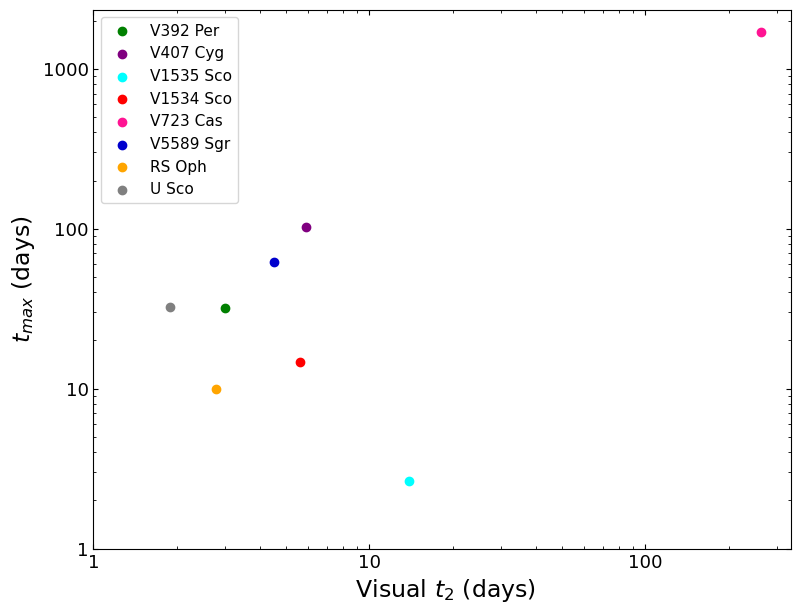

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(9,7)

#ax.plot(t2, poly(t2), color='black', linestyle=":", linewidth=2)



ax.scatter(t2[0], tmax[0], color='green', label="V392 Per")

ax.scatter(t2[1], tmax[1], color='purple', label="V407 Cyg")
            
ax.scatter(t2[2],tmax[2], color='aqua', label="V1535 Sco")
            
ax.scatter(t2[3],tmax[3], color='red', label="V1534 Sco")

ax.scatter(t2[4], tmax[4], color='deeppink', label="V723 Cas")

ax.scatter(t2[5], tmax[5], color='mediumblue', label="V5589 Sgr")

ax.scatter(t2[6], tmax[6], color='orange', label="RS Oph")

ax.scatter(t2[7], tmax[7], color='grey', label="U Sco")

#ax.plot(t2, fit_model_weights(t2), linestyle=":")

ax.set_xscale('log')
ax.set_xticks([1,10,100], labels = ['1','10', '100'], fontsize = 13)

ax.set_yscale('log')
ax.set_yticks([1, 10, 100, 1000], labels = ['1','10', '100', '1000'], fontsize = 13)

ax.set_xlabel(r" Visual $ t_{2} $ (days)", fontsize=17)
ax.set_ylabel(r"$ t_{max} $ (days)", fontsize=17)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title(r"$ t_{max} $ and $ t_{2} $ Correlation", fontsize=20)

plt.legend(fontsize = 11)
plt.show()
fig.savefig("Visual_vsoptical_time", dpi=300);

## Vpeak vs Smax

Plot showing the Flux (yaxis) at the highest peak, vs the Vpeak (x-axis)

(log on y axis, not on xaxis) (for 5 GHz frequency, (Vpeak has the mag going from gretest to lowest))


In [7]:
Vpeak = df['Vpeak (optical peak apparent mag)']

Smax = df['flux max (Smax)']
Smax_err = df["Smax error"]

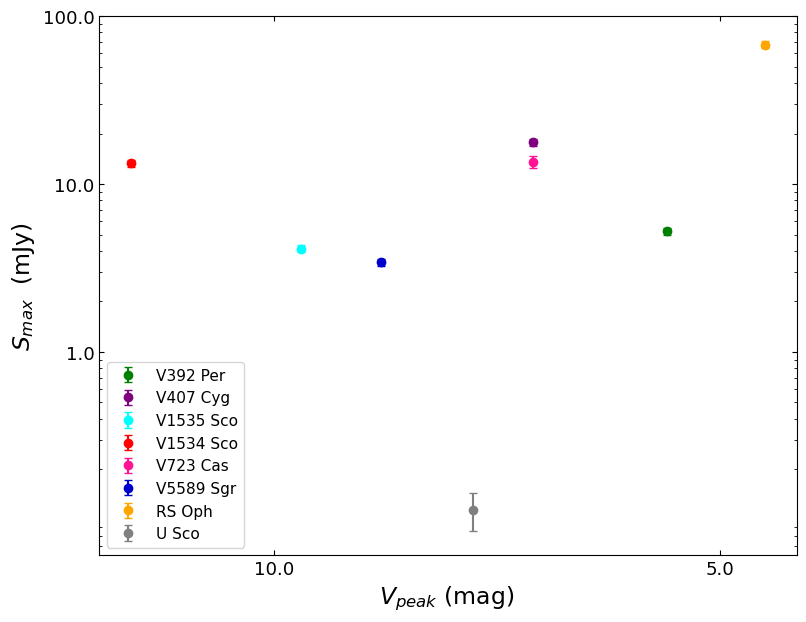

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(9,7)


ax.errorbar(Vpeak[0], Smax[0], yerr=Smax_err[0], fmt='o', color='green', label="V392 Per", capsize=3)

ax.errorbar(Vpeak[1], Smax[1], yerr=Smax_err[1], fmt='o', color='purple', label="V407 Cyg", capsize=3)

ax.errorbar(Vpeak[2], Smax[2], yerr=Smax_err[2], fmt='o', color='aqua', label="V1535 Sco", capsize=3)

ax.errorbar(Vpeak[3], Smax[3], yerr=Smax_err[3], fmt='o', color='red', label="V1534 Sco", capsize=3)            

ax.errorbar(Vpeak[4], Smax[4], yerr=Smax_err[4], fmt='o', color='deeppink', label="V723 Cas", capsize=3)

ax.errorbar(Vpeak[5], Smax[5], yerr=Smax_err[5], fmt='o', color='mediumblue', label="V5589 Sgr", capsize=3)

ax.errorbar(Vpeak[6], Smax[6], yerr=Smax_err[6], fmt='o', color='orange', label="RS Oph", capsize=3)

ax.errorbar(Vpeak[7], Smax[7], yerr=Smax_err[7], fmt='o', color='grey', label="U Sco", capsize=3)

ax.set_xticks([10,5], labels = ['10.0', '5.0'], fontsize = 13)
ax.invert_xaxis()

ax.set_yscale('log')
ax.set_yticks([1, 10, 100], labels = ['1.0', '10.0', '100.0'], fontsize = 13)

ax.set_xlabel(r"$ V_{peak} $ (mag) ", fontsize=17)
ax.set_ylabel(r"$ S_{max} $  (mJy)", fontsize=17)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_title(r"$ V_{peak} $ and $ S_{max} $ Correlation", fontsize=20)

plt.legend(fontsize = 11)
plt.show()
fig.savefig("Vis_vs_Optical_brightness", dpi=300);